In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])


In [58]:
netflix_dataset.head(100)

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
95,1245406,4.0
96,1834590,3.0
97,593225,3.0
98,1011918,4.0


In [59]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [60]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [61]:
netflix_dataset.shape

(24058263, 2)

In [62]:
movie_count = netflix_dataset.isnull().sum()
movie_count

,0
Cust_Id,0
Rating,4499


In [63]:
movie_count=movie_count["Rating"]
movie_count

4499

In [64]:
customer_count=netflix_dataset['Cust_Id'].nunique()

In [65]:
customer_count

475257

In [66]:
netflix_dataset['Cust_Id']

,Cust_Id
0,1:
1,1488844
2,822109
3,885013
4,30878
...,...
24058258,2591364
24058259,1791000
24058260,512536
24058261,988963


In [67]:
customer_count

475257

In [68]:
customer_count=customer_count-movie_count
customer_count

470758

In [69]:
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

In [70]:
netflix_dataset['Rating'].count()

24053764

In [71]:
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [72]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


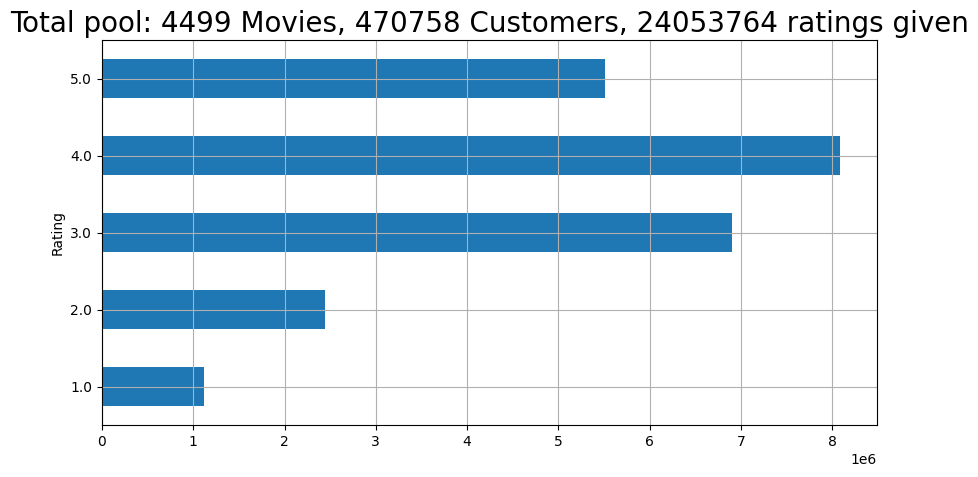

In [73]:
ax=stars.plot(kind='barh', legend=False, figsize=(10,5))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [74]:
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [75]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [76]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [77]:
df_nan.shape

(4499, 1)

In [78]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [79]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [80]:
df_nan=df_nan.reset_index()

In [81]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [82]:
df_nan['index'][1:]

,index
1,548
2,694
3,2707
4,2850
5,3991
...,...
4494,24046714
4495,24047329
4496,24056849
4497,24057564


In [83]:
df_nan['index'][:-1]

,index
0,0
1,548
2,694
3,2707
4,2850
...,...
4493,24046583
4494,24046714
4495,24047329
4496,24056849


In [84]:
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

#account for last record and corresponding length
#numpy approach
last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1), movie_id)#movie id will be 4499
movie_np=np.append(movie_np, last_record)

In [85]:
np.full((1,0),1)

array([], shape=(1, 0), dtype=int64)

In [86]:
df_nan.iloc[-1,0]

24057834

In [87]:
df_nan.iloc[-1,0]-1

24057833

In [88]:
24053764-24057834


-4070

In [89]:
24053764-24057834-1

-4071

In [90]:
len(netflix_dataset)

24058263

In [91]:
movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.499e+03, 4.499e+03,
       4.499e+03])

In [92]:
movie_np[-20:-1]

array([4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499.])

In [93]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset.loc[:,'Movie_Id']=movie_np.astype(int)
# netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.head()

Now the dataset will look like: 


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [94]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [95]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [96]:
dataset_movie_summary["count"].quantile(0.7)

1798.6

In [97]:
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [98]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [99]:
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


In [100]:
dataset_cust_summary['count'].quantile(0.7)

52.0

In [101]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [102]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='Cust_Id', length=327300)

In [103]:
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [104]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the trimming, the shape is: {}'.format(netflix_dataset.shape))

After the trimming, the shape is: (17337458, 3)


In [105]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [111]:
df_title = pd.read_csv("/content/movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
df_title.set_index('Movie_Id', inplace=True)


In [112]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [113]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [114]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357272 sha256=f7bdfa89764ece1cf1f3420d748ddd775a6abfecce3bb03055440bbdb18efd66
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader=Reader()

In [ ]:
data=Dataset.load_from_df(netflix_dataset[:100000], reader)

In [ ]:
data

In [ ]:
type(netflix_dataset)

In [ ]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)

In [ ]:
netflix_dataset.head()

In [ ]:
dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating']==5)]

In [ ]:
dataset_712664

In [ ]:
df_title

In [ ]:
user_712664=df_title.copy()
user_712664

In [ ]:
user_712664=user_712664.reset_index()
user_712664

In [ ]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

In [ ]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664['Estimate_Score']

In [ ]:
user_712664=user_712664.drop('Movie_Id', axis=1)

In [ ]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664)

In [ ]:
user_712664.head(10)

In [ ]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))